In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("smsspamcollection.tsv",sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
 print(f"The number of rows in  data frame={len(df)}")

The number of rows in  data frame=5572


In [9]:
print(f"How much classes we have??")
df['label'].unique()

How much classes we have??


array(['ham', 'spam'], dtype=object)

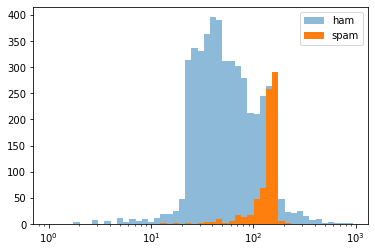

In [31]:
plt.xscale('log')
plt.hist(df[df['label']=='ham']['length'],bins=1.15**(np.arange(0,50)),alpha=0.5)
plt.hist(df[df['label']=='spam']['length'],bins=1.15**(np.arange(0,50)),alpha=1)
plt.legend(('ham','spam'))
plt.show()

## The length of ham is have a range of lengths but spam always have high values

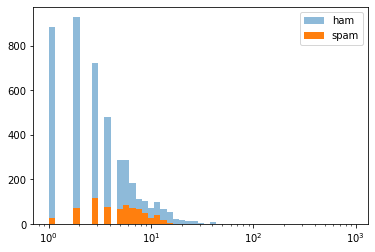

In [32]:
plt.xscale('log')
plt.hist(df[df['label']=='ham']['punct'],bins=1.15**(np.arange(0,50)),alpha=0.5)
plt.hist(df[df['label']=='spam']['punct'],bins=1.15**(np.arange(0,50)),alpha=1)
plt.legend(('ham','spam'))
plt.show()

## Spliting the data 

In [38]:
features=df[['length','punct']]
labels=df['label']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.3,random_state=42)

In [44]:
xtrain.shape

(3900, 2)

In [43]:
xtest.shape

(1672, 2)

In [45]:
ytest

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [46]:
from sklearn.linear_model import LogisticRegression

In [51]:
model=LogisticRegression(solver='lbfgs')
model.fit(xtrain,ytrain)

LogisticRegression()

In [55]:
predictions=model.predict(xtest)

In [53]:
model.score(xtest,ytest)

0.8427033492822966

In [54]:
from sklearn import metrics 

In [58]:
cm=metrics.confusion_matrix(ytest,predictions)

Text(69.0, 0.5, 'Truth')

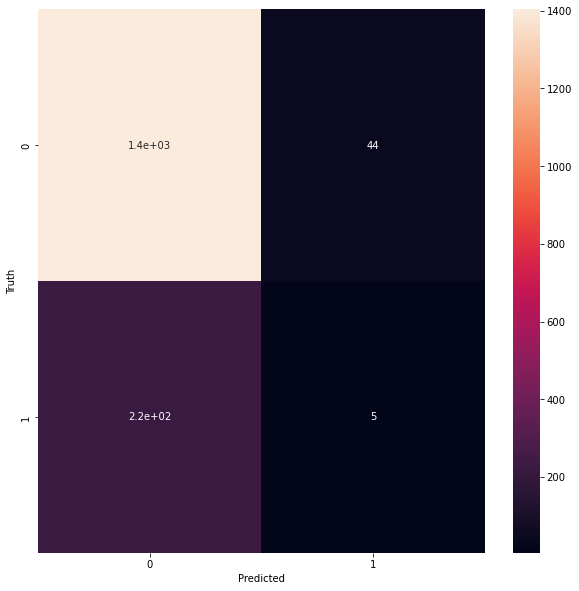

In [62]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [63]:
print(metrics.classification_report(ytest,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [64]:
print(metrics.accuracy_score(ytest,predictions))

0.8427033492822966


In [65]:
from sklearn.naive_bayes import MultinomialNB 

In [66]:
model=MultinomialNB()

In [67]:
model.fit(xtrain,ytrain)

MultinomialNB()

In [68]:
predictions=model.predict(xtest)

In [69]:
cm=metrics.confusion_matrix(ytest,predictions)

Text(69.0, 0.5, 'Truth')

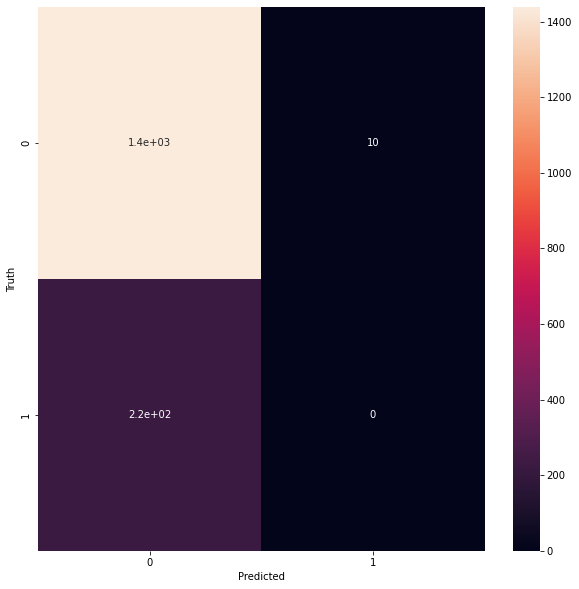

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
print(metrics.accuracy_score(ytest,predictions))

0.8600478468899522


In [72]:
print(metrics.classification_report(ytest,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [73]:
from sklearn.svm import SVC

In [74]:
model=SVC(gamma='auto')

In [75]:
model.fit(xtrain,ytrain)

SVC(gamma='auto')

In [76]:
predictions=model.predict(xtest)

In [77]:
cm=metrics.confusion_matrix(ytest,predictions)

Text(69.0, 0.5, 'Truth')

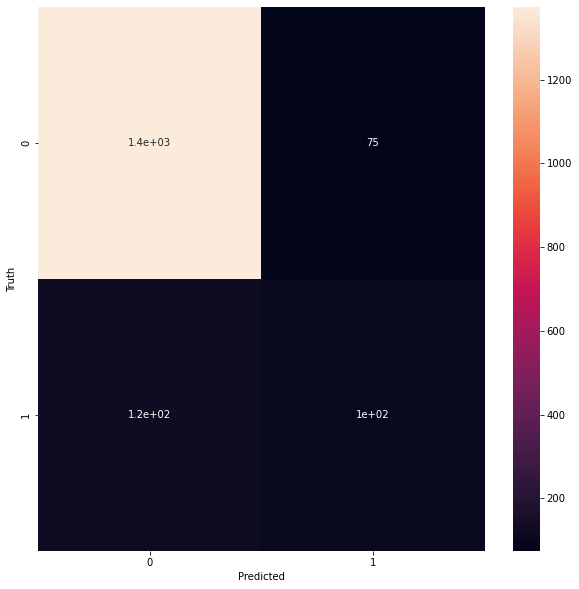

In [78]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [79]:
print(metrics.accuracy_score(ytest,predictions))

0.8827751196172249


In [80]:
print(metrics.classification_report(ytest,predictions))

              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672

